In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in list(coordinates):
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hofn is
butaritari ki
kapaa us
vaini to
chuy uy
mogadishu so
agadez ne
nikolskoye ru
atuona pf
kapaa us
pasighat in
illoqqortoormiut gl
the valley ai
kamenskoye ru
rikitea pf
rikitea pf
rosita ni
lakselv no
kaitangata nz
nizhneyansk ru
provideniya ru
atar mr
rikitea pf
bacuit ph
eyl so
camocim br
fortuna us
punta arenas cl
punta arenas cl
rikitea pf
mocuba mz
port alfred za
port alfred za
ushuaia ar
ushuaia ar
teya ru
bonavista ca
ushuaia ar
karpogory ru
hasaki jp
sao geraldo do araguaia br
punta arenas cl
tepeojuma mx
berbera so
gasa bt
pemangkat id
punta arenas cl
santiago cl
puri in
pevek ru
tuktoyaktuk ca
bluff nz
upernavik gl
lashma ru
butaritari ki
pangnirtung ca
tiksi ru
puerto ayora ec
thompson ca
voznesenye ru
rikitea pf
rikitea pf
lompoc us
pahalgam in
vardo no
geraldton au
ushuaia ar
chuy uy
kavieng pg
mount gambier au
husavik is
naze jp
souillac mu
red bluff us
vanimo pg
lata sb
atuona pf
dunedin nz
puerto ayora ec
mildura au
albany au
vung tau vn
labuhan id
hilo us
pompeia

ponta do sol cv
atuona pf
mataura pf
new norfolk au
ushuaia ar
broken hill au
goderich sl
bluff nz
bom jesus br
rikitea pf
cherskiy ru
ushuaia ar
benghazi ly
deputatskiy ru
vanavara ru
chokurdakh ru
tsihombe mg
mar del plata ar
atuona pf
barrow us
tabiauea ki
pontes e lacerda br
taolanaro mg
hobart au
rikitea pf
nuuk gl
jamestown sh
morgan city us
east london za
nikolskoye ru
manokwari id
valparaiso cl
castro cl
bluff nz
albany au
mutsamudu km
kruisfontein za
castro cl
qaanaaq gl
trairi br
cape town za
cape town za
pangnirtung ca
aleksandrov gay ru
chuy uy
hobyo so
hermanus za
miraflores co
barrow us
hermanus za
elban ru
tessalit ml
castro cl
khatanga ru
rikitea pf
kapaa us
acarau br
inverell au
leningradskiy ru
nizhneyansk ru
sakakah sa
rikitea pf
sioux lookout ca
xinxiang cn
puerto ayora ec
bluff nz
shalinskoye ru
churapcha ru
lompoc us
rikitea pf
lokosovo ru
ushuaia ar
east london za
chuy uy
taolanaro mg
jamestown sh
mahebourg mu
saint-pierre pm
tiksi ru
punta arenas cl
ushuaia ar
c

punta arenas cl
westport nz
punta arenas cl
taolanaro mg
albany au
kloulklubed pw
xinzhi cn
rikitea pf
mount gambier au
rikitea pf
ishigaki jp
tiksi ru
atuona pf
ribeira grande pt
fort nelson ca
cabo san lucas mx
raudeberg no
fiche et
aklavik ca
puerto ayora ec
katsuura jp
puerto ayora ec
ushuaia ar
cape town za
port macquarie au
punta arenas cl
taolanaro mg


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0d3d05c33c230bf1502027afc304656


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hofn
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | mogadishu
Processing Record 7 of Set 1 | agadez
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | pasighat
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | the valley
Processing Record 13 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | rosita
Processing Record 16 of Set 1 | lakselv
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | atar
Processing Record 21 of Set 1 | bacuit
City no

Processing Record 41 of Set 4 | bodden town
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | can tho
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | port keats
Processing Record 47 of Set 4 | faranah
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | sao jose da coroa grande
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | yemelyanovo
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | corrente
Processing Record 4 of Set 5 | matara
Processing Record 5 of Set 5 | olafsvik
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | barbar
City not found. Skipping...
Processing Record 9 of Set 5 | half moon bay
Processing Record 10 of Set 5 | aklavik
Processing Record 11 of Set 5 | fallon
Processing Record 12 of Set 5 | pacific grove
Processing

Processing Record 28 of Set 8 | shalinskoye
Processing Record 29 of Set 8 | churapcha
Processing Record 30 of Set 8 | lokosovo
Processing Record 31 of Set 8 | mahebourg
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | pontianak
Processing Record 34 of Set 8 | tanabe
Processing Record 35 of Set 8 | emba
Processing Record 36 of Set 8 | biak
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | dwarka
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | virginia beach
Processing Record 42 of Set 8 | yulara
Processing Record 43 of Set 8 | mairipora
Processing Record 44 of Set 8 | shache
Processing Record 45 of Set 8 | neiafu
Processing Record 46 of Set 8 | slave lake
Processing Record 47 of Set 8 | khasan
Processing Record 48 of Set 8 | ust-kuyga
Processing Record 49 of Set 8 | nyurba
Processing Record 50 of Set 8 | valle hermoso
Processing Record 1 of Set 9 | palembang
Processing R

Processing Record 18 of Set 12 | barra do garcas
Processing Record 19 of Set 12 | necochea
Processing Record 20 of Set 12 | el real de santa maria
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | rincon
Processing Record 23 of Set 12 | ahipara
Processing Record 24 of Set 12 | zakamensk
Processing Record 25 of Set 12 | svetlogorsk
Processing Record 26 of Set 12 | nargana
Processing Record 27 of Set 12 | menongue
Processing Record 28 of Set 12 | strezhevoy
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | amapa
Processing Record 31 of Set 12 | porto velho
Processing Record 32 of Set 12 | altay
Processing Record 33 of Set 12 | enumclaw
Processing Record 34 of Set 12 | inirida
Processing Record 35 of Set 12 | rungata
City not found. Skipping...
Processing Record 36 of Set 12 | carndonagh
Processing Record 37 of Set 12 | mackay
Processing Record 38 of Set 12 | samusu
City not found. Skipping...
Processing Record 39 of Set 12 | vila do maio


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hofn,IS,2021-03-11 05:07:29,64.2539,-15.2082,37.08,76,74,10.36
1,Butaritari,KI,2021-03-11 05:02:59,3.0707,172.7902,81.77,76,57,9.37
2,Kapaa,US,2021-03-11 05:07:30,22.0752,-159.3190,72.00,94,90,8.05
3,Vaini,TO,2021-03-11 05:07:31,-21.2000,-175.2000,78.80,73,40,6.91
4,Chuy,UY,2021-03-11 05:07:31,-33.6971,-53.4616,62.11,86,0,1.01
5,Mogadishu,SO,2021-03-11 05:07:32,2.0371,45.3438,78.80,69,75,6.91
6,Agadez,NE,2021-03-11 05:07:32,19.7500,10.2500,72.61,17,1,6.46
7,Nikolskoye,RU,2021-03-11 05:07:33,59.7035,30.7861,6.01,71,20,11.18
8,Atuona,PF,2021-03-11 05:03:29,-9.8000,-139.0333,79.63,66,88,14.63
9,Pasighat,IN,2021-03-11 05:07:34,28.0667,95.3333,77.50,39,92,1.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

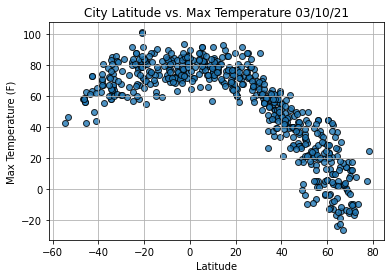

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

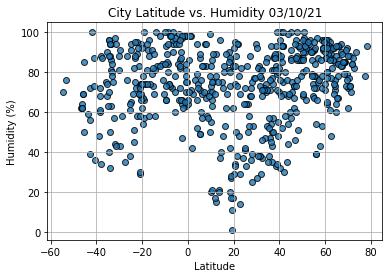

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

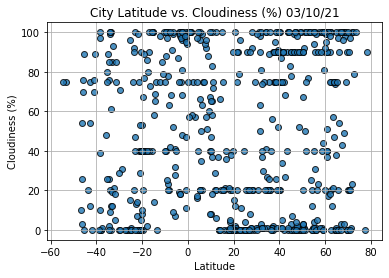

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

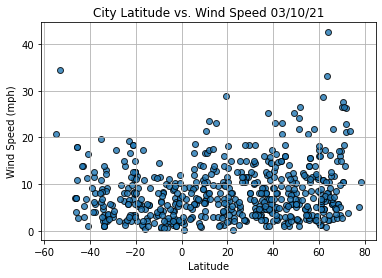

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [21]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

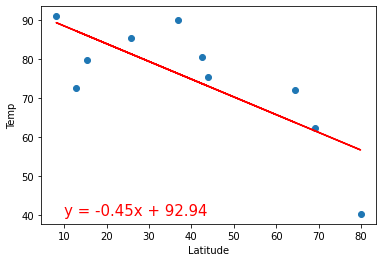

In [22]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Lakselv
Country                        NO
Date          2021-03-11 05:07:36
Lat                       70.0513
Lng                       24.9718
Max Temp                      8.6
Humidity                       72
Cloudiness                     20
Wind Speed                  26.46
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
569     True
570     True
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hofn,IS,2021-03-11 05:07:29,64.2539,-15.2082,37.08,76,74,10.36
1,Butaritari,KI,2021-03-11 05:02:59,3.0707,172.7902,81.77,76,57,9.37
2,Kapaa,US,2021-03-11 05:07:30,22.0752,-159.3190,72.00,94,90,8.05
5,Mogadishu,SO,2021-03-11 05:07:32,2.0371,45.3438,78.80,69,75,6.91
6,Agadez,NE,2021-03-11 05:07:32,19.7500,10.2500,72.61,17,1,6.46


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

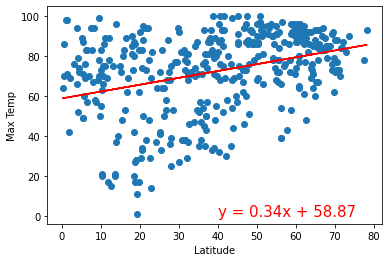

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(40,0))

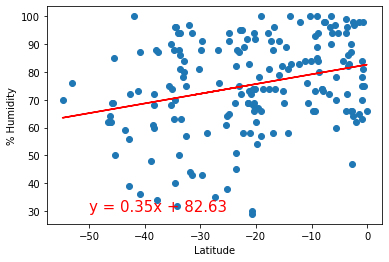

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50, 30))

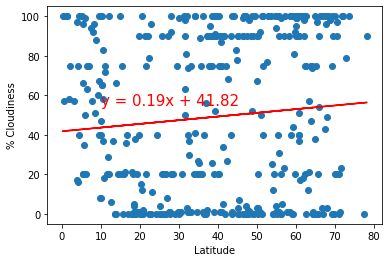

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

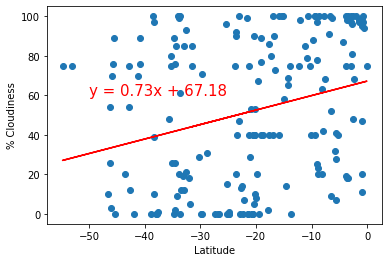

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

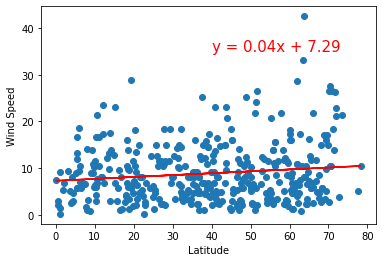

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

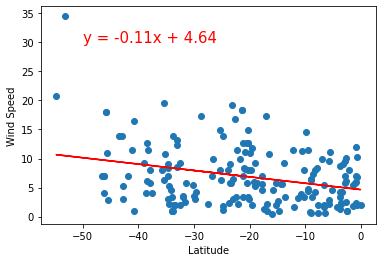

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))